## Roulette Simulation and Profit Analysis

Roulette is a popular casino game played with a wheel that has numbered slots colored red, black, or green. In American roulette, the wheel has 38 slots: 18 red slots, 18 black slots, and 2 green slots labeled "0" and "00."

Players can place various types of bets, including betting on whether the outcome will be a red or black slot. In this exercise, we focus on a simple bet: betting on black.

<div style="text-align: center;">
    <img src="additional_files\image.png" alt="Roulette Wheel" style="width: 30%;">
</div>

If you place a bet on black and the outcome is indeed black, you win and double your money. However, if the outcome is red or green, you lose the amount you bet. For example, if you bet 1 dollar on black and win, you gain 1 dollar. If you lose, you forfeit your 1-dollar bet.

Since there are three colors, the probability of landing on black is not exactly $\frac{1}{2}$, but rather: $\frac{18}{38} = \frac{9}{19}$

### 1.function that simulates this game for 𝑁 rounds

In [17]:
import random

def roulette_simulation(N):
    total_earned = 0
    for _ in range(N):
        number = random.randint(1, 38)
        if number <= 18:
            total_earned += 1
        else:
            total_earned -= 1
            
    return total_earned


In [18]:
N = 1000
earnings = roulette_simulation(N)
print(earnings)

-40


### 2. Monte Carlo simulation

Theoretical
  expected value for one time:     -0.053
  variance for one time:            0.99723
--------------------------------------------------
Results for N = 10:
  Sample Mean:                     -0.520
  Sample SE:                        0.00995
--------------------------------------------------
Results for N = 25:
  Sample Mean:                     -1.322
  Sample SE:                        0.01573
--------------------------------------------------
Results for N = 100:
  Sample Mean:                     -5.338
  Sample SE:                        0.03155
--------------------------------------------------
Results for N = 1000:
  Sample Mean:                     -52.670
  Sample SE:                        0.09988
--------------------------------------------------


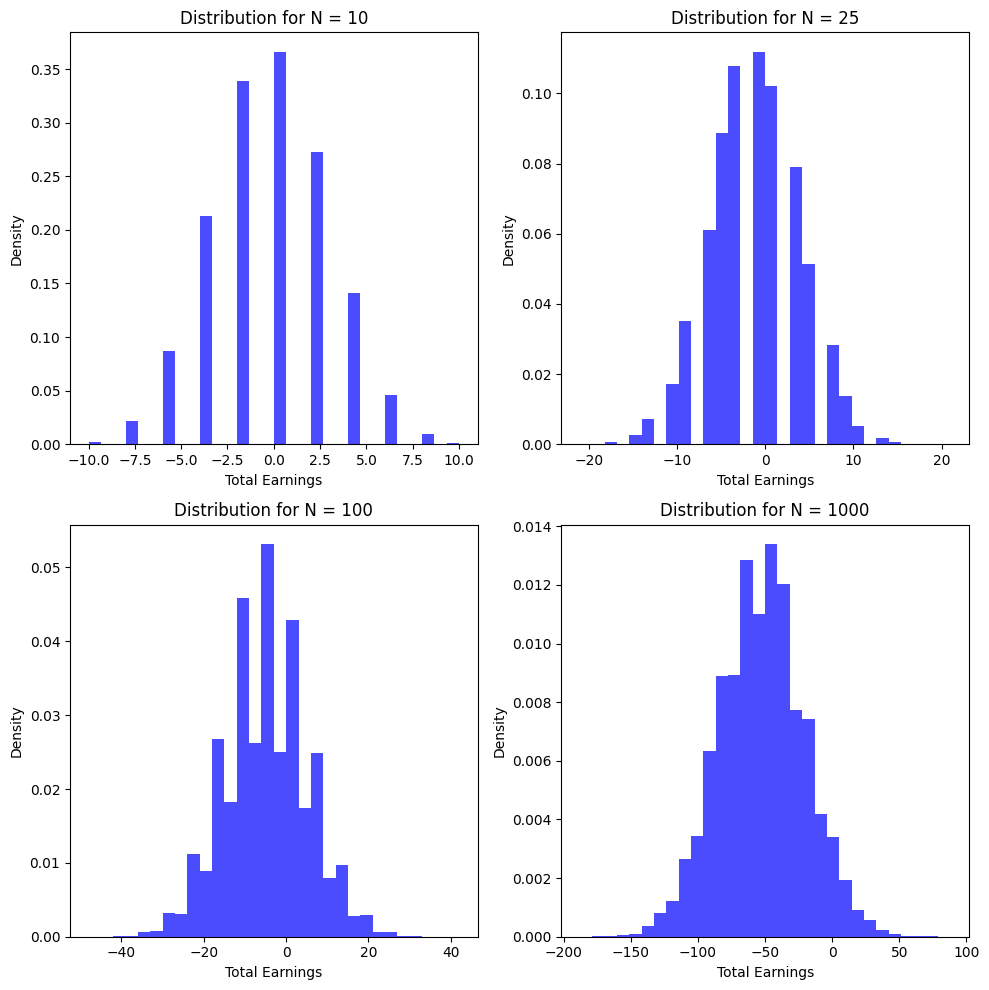

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

num_simulations = 100000
N_values = [10, 25, 100, 1000]

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.flatten()

for i in range(len(N_values)):
    results = [roulette_simulation(N_values[i]) for _ in range(num_simulations)]
    results = np.array(results)

    ax = axes[i]
    ax.hist(results, bins=30, density=True, alpha=0.7, color='blue')
    ax.set_title(f"Distribution for N = {N_values[i]}")
    ax.set_xlabel("Total Earnings")
    ax.set_ylabel("Density")
    
    sample_mean = np.mean(results)
    sample_std = np.std(results, ddof=1)
    sample_se = sample_std / np.sqrt(num_simulations)
    
    print(f"Results for N = {N_values[i]}:")
    print(f"  Sample Mean:                     {sample_mean:.3f}")
    print(f"  Sample SE:                        {sample_se:.5f}")
    print("-" * 50)
    
plt.tight_layout()
plt.show()

### 3.previous simulation but for the average winnings

Theoretical
  expected value for one time:     -0.053
  variance for one time:            0.99723
--------------------------------------------------
Results for N = 10:
  Sample Mean:                     -0.053
  Sample SE:                        0.00100
--------------------------------------------------
Results for N = 25:
  Sample Mean:                     -0.053
  Sample SE:                        0.00063
--------------------------------------------------
Results for N = 100:
  Sample Mean:                     -0.053
  Sample SE:                        0.00032
--------------------------------------------------
Results for N = 1000:
  Sample Mean:                     -0.052
  Sample SE:                        0.00010
--------------------------------------------------


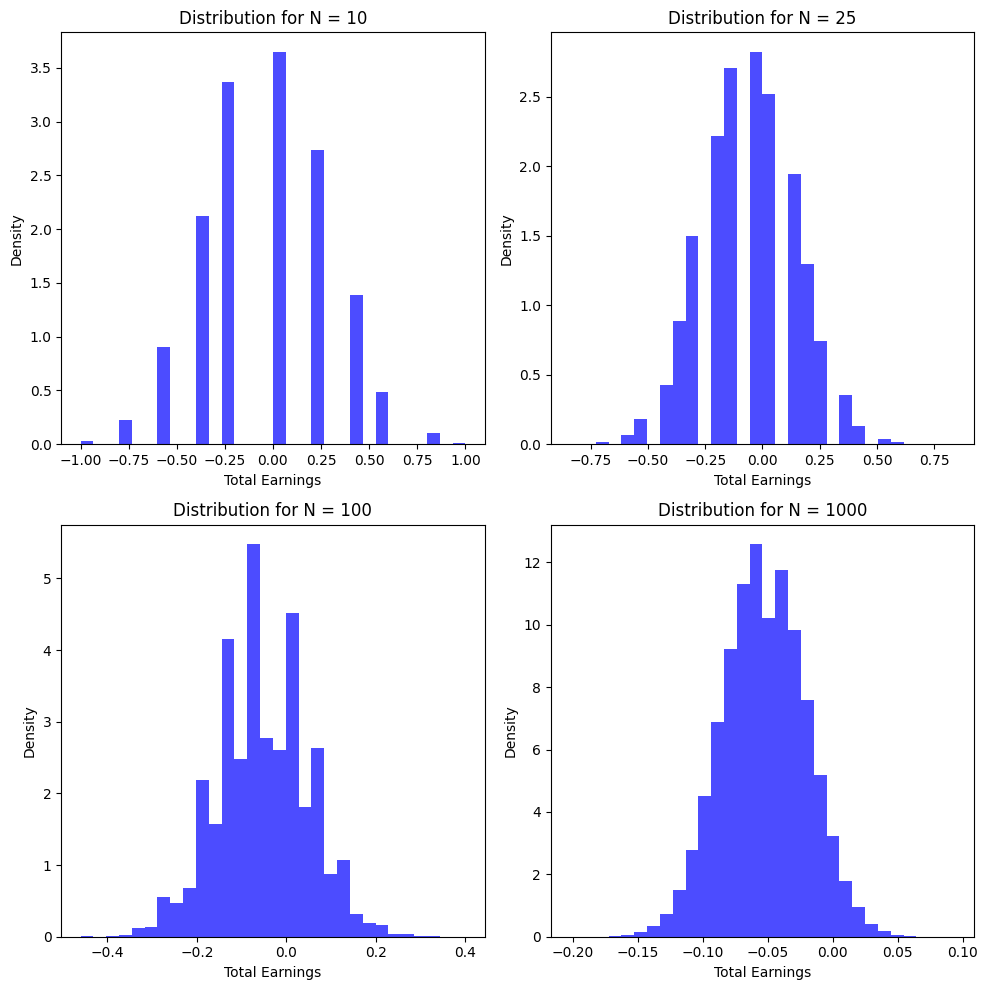

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

num_simulations = 100000
N_values = [10, 25, 100, 1000]

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.flatten()

for i in range(len(N_values)):
    
    results = [roulette_simulation(N_values[i])/N_values[i] for _ in range(num_simulations)]
    results = np.array(results)

    ax = axes[i]
    ax.hist(results, bins=30, density=True, alpha=0.7, color='blue')
    ax.set_title(f"Distribution Average Winnings for N = {N_values[i]}")
    ax.set_xlabel("Total Earnings")
    ax.set_ylabel("Density")
    
    sample_mean = np.mean(results)
    sample_std = np.std(results, ddof=1)
    sample_se = sample_std / np.sqrt(num_simulations)
    
    print(f"Results for N = {N_values[i]}:")
    print(f"  Sample Mean:                     {sample_mean:.3f}")
    print(f"  Sample SE:                        {sample_se:.5f}")
    print("-" * 50)
    
plt.tight_layout()
plt.show()

### 4.compare theoretical values with Monte Carlo simulation results

In [57]:
num_simulations = 100000
N_values = [10, 25, 100, 1000]

Expected_value_single = -1 / 19  # E(X) = (18/38)*1 + (20/38)*(-1)
Variance_single = 360 / 361  # Var(X) = 1 - (-1/19)^2

for i in range(len(N_values)):
    results = [roulette_simulation(N_values[i]) for _ in range(num_simulations)]
    results = np.array(results)

    sample_mean = np.mean(results)
    sample_std = np.std(results, ddof=1)
    sample_se = sample_std / np.sqrt(num_simulations)
    
    theoretical_mean = N_values[i] * Expected_value_single
    theoretical_std = np.sqrt(N_values[i] * Variance_single)
    theoretical_se = theoretical_std / np.sqrt(num_simulations)
    
    print(f"Results for N = {N_values[i]}:")
    print(f"  Sample Mean:                     {sample_mean:.3f}")
    print(f"  Theoretical Mean:                {theoretical_mean:.3f}")
    print(f"  Sample SE:                        {sample_se:.5f}")
    print(f"  Theoretical SE:                   {theoretical_se:.5f}")
    print("-" * 50)

Results for N = 10:
  Sample Mean:                     -0.509
  Theoretical Mean:                -0.526
  Sample SE:                        0.01002
  Theoretical SE:                   0.00999
--------------------------------------------------
Results for N = 25:
  Sample Mean:                     -1.318
  Theoretical Mean:                -1.316
  Sample SE:                        0.01576
  Theoretical SE:                   0.01579
--------------------------------------------------
Results for N = 100:
  Sample Mean:                     -5.270
  Theoretical Mean:                -5.263
  Sample SE:                        0.03158
  Theoretical SE:                   0.03158
--------------------------------------------------
Results for N = 1000:
  Sample Mean:                     -52.696
  Theoretical Mean:                -52.632
  Sample SE:                        0.09999
  Theoretical SE:                   0.09986
--------------------------------------------------


### 5. CLT Approximation vs Monte Carlo Estimate

For $N = 25$:

- *Mean of $S_N$*:  
  $$
    \mu = E[S_N] = N \times E[X_i] = 25 \times \left(-\frac{1}{19}\right) = -\frac{25}{19}
  $$

- *Standard Deviation of $S_N$*:  
  $$
    \sigma = \sqrt{N \times \mathrm{Var}(X_i)} = \sqrt{25 \times \frac{360}{361}} = 5 \sqrt{\frac{360}{361}}
  $$

We want the probability that **the casino loses money**, which means:

$$
P(\text{casino loses}) = P(S_N > 0).
$$

By the Central Limit Theorem, for moderate $N$, $S_N$ is approximately normal with mean $\mu$ and standard deviation $\sigma$.

$$
P(S_N > 0) 
= P\left(\frac{S_N - \mu}{\sigma} > \frac{0 - \mu}{\sigma}\right) 
= 1 - \Phi\!\Bigl(\frac{0 - \mu}{\sigma}\Bigr)
$$

where $\Phi$ is the standard normal CDF.

In [ ]:
import math
import numpy as np
from scipy.stats import norm

mu = N * Expected_value_single
sigma = math.sqrt(N * Variance_single)

z_value = (0 - mu) / sigma
clt_probability = 1 - norm.cdf(z_value)

print(f"CLT Approximation: {clt_probability:.5f}")

def monte_carlo_estimate(N, num_simulations):
    count_casino_loses = 0
    for _ in range(num_simulations):
        s = roulette_simulation(N)
        if s > 0:
            count_casino_loses += 1
    return count_casino_loses / num_simulations

mc_probability = monte_carlo_estimate(N, num_simulations)
print(f"Monte Carlo Estimate: {mc_probability:.5f}")


CLT Approximation: 0.39607
Monte Carlo Estimate: 0.39571


### 6.Plot the probability that the casino loses money

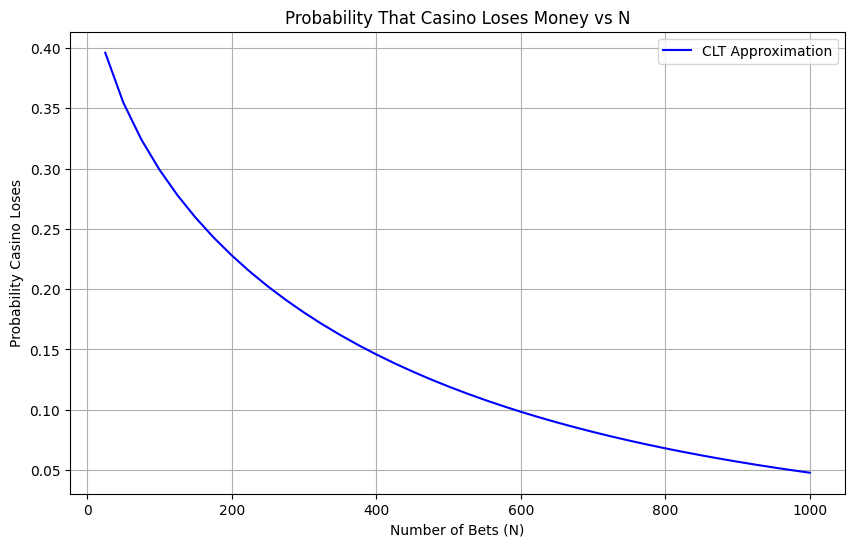

In [66]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import norm

N_values = np.arange(25, 1001, 25)  # Values of N from 25 to 1000 in steps of 25

clt_probabilities = []
mc_probabilities = []

for N in N_values:
    mu = N * Expected_value_single
    sigma = math.sqrt(N * Variance_single)
    z_value = (0 - mu) / sigma
    clt_prob = 1 - norm.cdf(z_value)
    clt_probabilities.append(clt_prob)
    
    # mc_prob = monte_carlo_estimate(N, num_simulations)
    # mc_probabilities.append(mc_prob)

plt.figure(figsize=(10, 6))
plt.plot(N_values, clt_probabilities, label="CLT Approximation", color='blue')
# plt.plot(N_values, mc_probabilities, label="Monte Carlo Estimate", color='red')
plt.xlabel("Number of Bets (N)")
plt.ylabel("Probability Casino Loses")
plt.title("Probability That Casino Loses Money vs N")
plt.legend()
plt.grid()
plt.show()

## Predicting the Outcome of the 2016 USA Presidential Election

## Drug Safety Test